In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [2]:
t = 0.3

k = 20
t_stim = 0.1
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)
print(len(ts))

times = fsutil.create_times(t, dt)

20


In [3]:
N = 50
w_in = 1.2e-9
bias = 5e-10

f = 50 # 50
A = 0e-10

r_b = 0.0

ns_e, ts_e, vs = neurons.adex(t, N, 
                             ns, ts, 
                             w_in=w_in,
                             bias=(bias, bias/20),
                             Ereset=(-46e-3, -55e-3),
                             f=f, A=A,
                             r_b=r_b,
                             time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in 4s


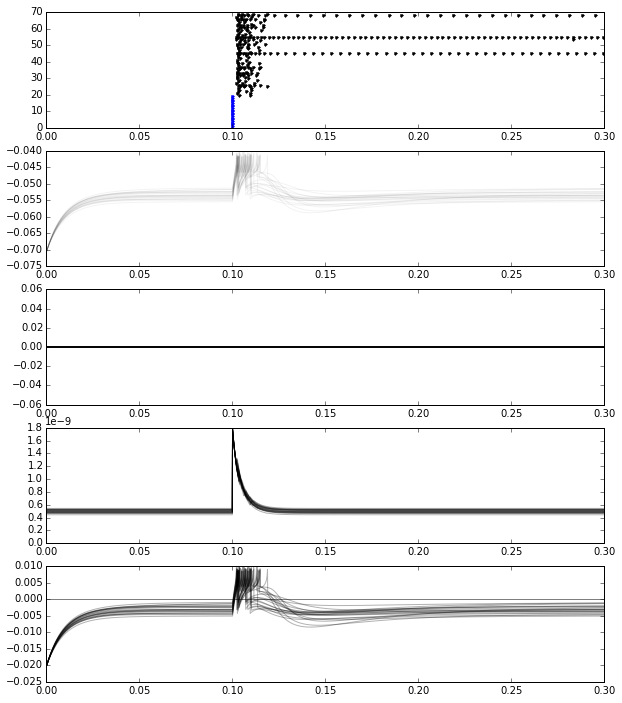

In [4]:
plt.figure(figsize=(10, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.xlim(0, .3)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.05);
    
plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.axhline(0.0, color='k', alpha=0.5)

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3); 
plt.axhline(0.0, color='k', alpha=0.5)

WARNING    /Users/type/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
 [py.warnings]


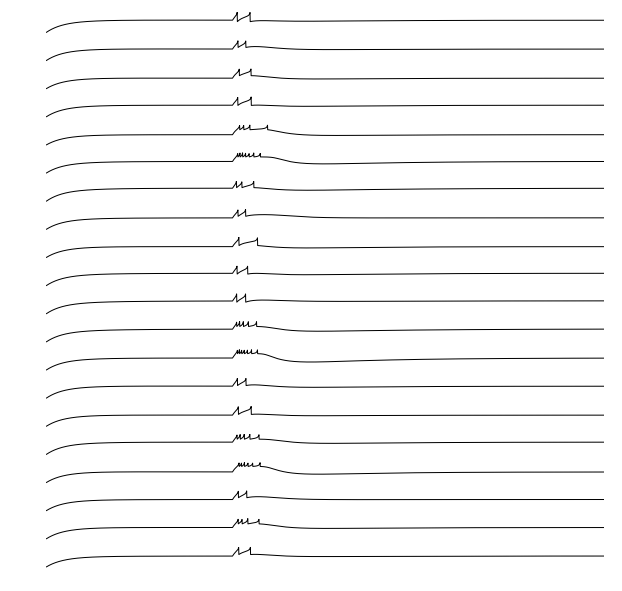

In [5]:
plt.figure(figsize=(10, 10))
for j in range(20):
    plt.subplot(20, 1, j)
    plt.plot(times, vs['vm'][j, :], 'k', alpha=1);
    plt.axis('off')

In [6]:
# Now readout the 'E' response, in another LIF 

In [9]:
Nz = 100

f = 0
A = 0
r_b = 0.0

ns_out, ts_out, vs_out = neurons.lif(t, Nz, 
                                     ns_e, ts_e,
                                     w_in=(0.1e-9, 0.1e-9 / 10),
                                     bias=(10e-6, 10e-6 / 10),
                                     f=f, A=A,
                                     r_b=r_b,
                                     time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in 4s


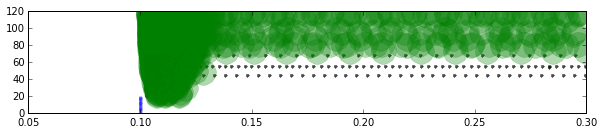

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(ts, ns, '.b', alpha=0.3)
plt.plot(ts_e, ns_e + k, '.k', alpha=0.7)
plt.plot(ts_out, ns_out + k + 1, '.g', alpha=0.3, markersize=50)
# plt.xlim(0.09, .15)